In [1]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
###############################################################################
### Create new output files with the hurricane at the center of the domain ####
###############################################################################

#%% Import modules
import os
import numpy as np   
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import matplotlib.colors as mcolors 
import matplotlib.style as mstyle
import pandas as pandas
import cmocean
import datetime
import scipy as scipy
from scipy import stats,signal
import pandas
import xarray as xr              


print("done importing modules")


done importing modules


In [2]:
#%% Define file locations
WRF_DIRECTORY_26 = "/projects/storm/mgomez/idealSims/sst_26_skipd01_skipCoLES_ndg/Results/" # precursor/
WRF_DIRECTORY_27 = "/projects/storm/mgomez/idealSims/sst_27real_skipd01_skipCoLES_ndg/Results/" # precursor/
WRF_DIRECTORY_28 = "/projects/storm/mgomez/idealSims/sst_28_skipd01_skipCoLES_ndg/Results/" # precursor/
WRF_DIRECTORY_30 = "/projects/storm/mgomez/idealSims/sst_30_skipd01_skipCoLES_ndg/Results/" # precursor/
WRF_DIRECTORY_32 = "/projects/storm/mgomez/idealSims/sst_32_skipd01_skipCoLES_ndg/Results/" # precursor/

dir_for_height = "/projects/storm/mgomez/idealSims/sst_32_skipd01_skipCoLES_ndg/"

WRF_DIRS = [WRF_DIRECTORY_26,WRF_DIRECTORY_27,WRF_DIRECTORY_28,WRF_DIRECTORY_30,WRF_DIRECTORY_32]

# Choose which domain to evaluate
domains = ['d01','d02']

# Whether or not to save figures
saveFig = 'False'

# Vertical level to get max wind speed
i_z_max = 0

dirFig = "/projects/storm/mgomez/idealSims/Figures/"

# Maximum height to save data
max_z_save = 30 #500

In [3]:
# Choose one simulation and one domain
WRF_DIRECTORY = WRF_DIRS[0]
domain = domains[1]   
    
print(WRF_DIRECTORY)
print(domain)

/projects/storm/mgomez/idealSims/sst_26_skipd01_skipCoLES_ndg/Results/
d02


In [4]:
#%% Turbine specifications
D = 126
z_hh = 90
rated_ws = 11.4

In [5]:
# For figures
if 'sst_26' in WRF_DIRECTORY:
    lab_fig = 'sst_26'
elif 'sst_30' in WRF_DIRECTORY:
    lab_fig = 'sst_30'
elif 'sst_28' in WRF_DIRECTORY:
    lab_fig = 'sst_28'
elif 'sst_27real' in WRF_DIRECTORY:
    lab_fig = 'sst_27r'
elif 'sst_27' in WRF_DIRECTORY:
    lab_fig = 'sst_27'
elif 'sst_32' in WRF_DIRECTORY:
    lab_fig = 'sst_32'

In [6]:
# Extract height variables
if 'precursor' in WRF_DIRECTORY:
    WRF_DIRECTORY_tmp = WRF_DIRECTORY[0:-1*(len('precursor')+1)]
else:
    WRF_DIRECTORY_tmp = WRF_DIRECTORY
    
entries = os.listdir(dir_for_height)
ofInterest = []
for i in np.arange(len(entries)):
    if 'wrfrst' in entries[i]:
        ofInterest = np.append(ofInterest,i)
    if 'wrfout' in entries[i]:
        ofInterest = np.append(ofInterest,i)
ofInterest = ofInterest.astype('int')
rndmFromInterest = np.random.choice(ofInterest)
ds=xr.open_dataset(dir_for_height+str(entries[rndmFromInterest]),decode_times=False)
if 'wrfrst' in entries[rndmFromInterest]:
    ph = ds['PH_1']
else:
    ph = ds['PH']
ph = np.array(ph[0,:,:,:])
phb = ds['PHB']
phb = np.array(phb[0,:,:,:])
height_stag = (np.mean(ph,axis=(1,2))+np.mean(phb,axis=(1,2)))/9.81
height_agl = 0.5*(height_stag[1:] + height_stag[0:-1])
ds.close()
ph = 0.0
phb = 0.0

iz_max = np.argmin(np.abs(height_agl - max_z_save))


print(height_agl[0:10])


[ 10.788022  32.89681   56.097748  80.44559  105.99692  132.80931
 160.94324  190.46254  221.43457  253.92978 ]


In [7]:
#%% Define times for analysis
if 'precursor' in WRF_DIRECTORY:
    if 'sst_26' in WRF_DIRECTORY:
        time_0 = np.datetime64('2000-01-05T00:00:00')
        time_1 = time_0 + np.timedelta64(24,'h')
    elif 'sst_30' in WRF_DIRECTORY:
        time_0 = np.datetime64('2000-01-05T00:00:00')
        time_1 = time_0 + np.timedelta64(24,'h')
    elif 'sst_28' in WRF_DIRECTORY:
        time_0 = np.datetime64('2000-01-04T10:00:00')
        time_1 = time_0 + np.timedelta64(24,'h')
    elif 'sst_27real' in WRF_DIRECTORY:
        time_0 = np.datetime64('2000-01-06T00:00:00')
        time_1 = time_0 + np.timedelta64(24,'h')
    elif 'sst_27' in WRF_DIRECTORY:
        time_0 = np.datetime64('2000-01-05T00:00:00')
        time_1 = time_0 + np.timedelta64(24,'h')
else:
    if domain=='d01':
        # Choose times for analysis based on simulation
        if 'sst_26' in WRF_DIRECTORY:
            time_0 = np.datetime64('2000-01-06T09:00:00')
            time_1 = np.datetime64('2000-01-06T12:00:00')
        elif 'sst_30' in WRF_DIRECTORY:
            time_0 = np.datetime64('2000-01-06T09:00:00')
            time_1 = np.datetime64('2000-01-06T12:00:00')
        elif 'sst_28' in WRF_DIRECTORY:
            time_0 = np.datetime64('2000-01-06T09:00:00')
            time_1 = np.datetime64('2000-01-06T12:00:00')
        elif 'sst_27real' in WRF_DIRECTORY:
            time_0 = np.datetime64('2000-01-06T14:00:00')
            time_1 = np.datetime64('2000-01-06T17:00:00')
        elif 'sst_27' in WRF_DIRECTORY:
            time_0 = np.datetime64('2000-01-06T09:00:00')
            time_1 = np.datetime64('2000-01-06T12:00:00')
        elif 'sst_32' in WRF_DIRECTORY:
            time_0 = np.datetime64('2000-01-05T07:00:00')
            time_1 = np.datetime64('2000-01-05T10:00:00')
    elif domain=='d02':
        # Choose times for analysis based on simulation
        if 'sst_26' in WRF_DIRECTORY:
            time_0 = np.datetime64('2000-01-06T10:57:00')
            time_1 = np.datetime64('2000-01-06T11:30:00')
        elif 'sst_27real' in WRF_DIRECTORY:
            time_0 = np.datetime64('2000-01-06T16:00:00')
            time_1 = np.datetime64('2000-01-06T16:30:00')
        elif 'sst_28' in WRF_DIRECTORY:
            time_0 = np.datetime64('2000-01-06T10:56:00')
            time_1 = np.datetime64('2000-01-06T11:30:00')
        elif 'sst_30' in WRF_DIRECTORY:
            time_0 = np.datetime64('2000-01-06T11:00:00')
            time_1 = np.datetime64('2000-01-06T11:30:00')
        elif 'sst_32' in WRF_DIRECTORY:
            time_0 = np.datetime64('2000-01-05T08:00:00')
            time_1 = np.datetime64('2000-01-05T08:30:00')

# Find auxHist files for current domain within directory
entries = os.listdir(WRF_DIRECTORY)
ofInterest = []
for i in np.arange(len(entries)):
    # Check if domain matches
    if domain in entries[i]:
        # Check if it is an auxHist file
        if 'auxH' in entries[i]:
            ending = entries[i][-3:] # Some files end in :30, others in :00
            ending = '0' + ending
            if ending in entries[i]:
                ofInterest = np.append(ofInterest,i)
                # # Check if time matches
                # ds = xr.open_dataset(WRF_DIRECTORY+entries[i],decode_times=False)
                # time_temp = np.array(ds['Times'])
                # ds.close()
                # ttime = np.array(['2000-01-01T00:00:00'], dtype='datetime64')
                # a = str(time_temp)
                # ttime = np.datetime64(a[3:13] + str(' ')+ a[14:-2])
                # if (ttime<time_1) & (ttime>time_0):
                #     ofInterest = np.append(ofInterest,i)
                #     print(entries[i])
                print(entries[i])
ofInterest = ofInterest.astype('int')
rndmFromInterest = np.random.choice(ofInterest)



auxHist24_d02_2000-01-06_10:30:30
auxHist24_d02_2000-01-06_10:50:30
auxHist24_d02_2000-01-06_11:20:30
auxHist24_d02_2000-01-06_11:10:30
auxHist24_d02_2000-01-06_11:00:30
auxHist24_d02_2000-01-06_10:20:30
auxHist24_d02_2000-01-06_10:40:30
auxHist24_d02_2000-01-06_10:00:30
auxHist24_d02_2000-01-06_10:10:30


In [8]:
# Extract and save data from each auxHist file
for i_f in np.arange(0,len(ofInterest),1):
    # Open file
    ds = xr.open_dataset(WRF_DIRECTORY+str(entries[ofInterest[i_f]]),decode_times=False)
    # Extract data
    u_temp = np.array(ds['U'])
    v_temp = np.array(ds['V'])
    w_temp = np.array(ds['W'])
    time_temp = np.array(ds['Times'])
    # De-stagger variables
    u_temp = 0.5*(u_temp[:,:,:,0:np.shape(u_temp)[3]-1]+u_temp[:,:,:,1:np.shape(u_temp)[3]])
    v_temp = 0.5*(v_temp[:,:,0:np.shape(v_temp)[2]-1,:]+v_temp[:,:,1:np.shape(v_temp)[2],:])
    w_temp = 0.5*(w_temp[:,0:np.shape(w_temp)[1]-1,:,:]+w_temp[:,1:np.shape(w_temp)[1],:,:])
    # Save variables
    if i_f==0:
        # Only keep data within heights of interest
        u_temp = u_temp[:,0:iz_max,:,:]
        v_temp = v_temp[:,0:iz_max,:,:]
        w_temp = w_temp[:,0:iz_max,:,:]
        height_agl = height_agl[0:iz_max]
        # Create new variables
        u = np.zeros_like(u_temp) + u_temp
        v = np.zeros_like(v_temp) + v_temp
        w = np.zeros_like(w_temp) + w_temp
        Time = []
        Time.append(time_temp)
        # Domain dimensions
        dx = ds.DX
        n_x = dx*np.arange(0,np.shape(u)[3])
        n_y = dx*np.arange(0,np.shape(u)[2])
        # Free-up memory
        ph = 0.0
        phb = 0.0
        height_stag = 0.0
    else:
        # Only keep data within heights of interest
        u_temp = u_temp[:,0:iz_max,:,:]
        v_temp = v_temp[:,0:iz_max,:,:]
        w_temp = w_temp[:,0:iz_max,:,:]
        # Append data to saved variables
        u = np.append(u,u_temp,axis=0)
        v = np.append(v,v_temp,axis=0)
        w = np.append(w,w_temp,axis=0)
        Time.append(time_temp)
    # Free-up memory
    u_temp = 0.0
    v_temp = 0.0
    w_temp = 0.0
    uv_temp = 0.0
    # Close file
    ds.close()
    print('Done with %i out of %i' % (i_f+1,len(ofInterest)))
    
uv = (u**2 + v**2)**0.5

Done with 1 out of 9
Done with 2 out of 9
Done with 3 out of 9
Done with 4 out of 9
Done with 5 out of 9
Done with 6 out of 9
Done with 7 out of 9
Done with 8 out of 9
Done with 9 out of 9


In [9]:
#%% Create time vector (after initialization) (ignore dates)
# Create large datetime64 array
ttime = np.arange('2000-01-01T00:00:00', '2000-01-02T00:00:00',np.shape(Time)[0], dtype='datetime64')
# Save actual times for simulation
for i_t in np.arange(0,np.shape(Time)[0]):
    a = str(Time[i_t])
    ttime[i_t] = np.datetime64(a[3:13] + str(' ')+ a[14:-2])
# Save portion of temp array that actually matters
ttime = ttime[0:np.shape(Time)[0]]

In [10]:
#%% Sort 3D fields by time
i_sort = np.argsort(ttime)
ttime = ttime[i_sort]
u = u[i_sort,:,:,:]
v = v[i_sort,:,:,:]
w = w[i_sort,:,:,:]
uv = uv[i_sort,:,:,:]


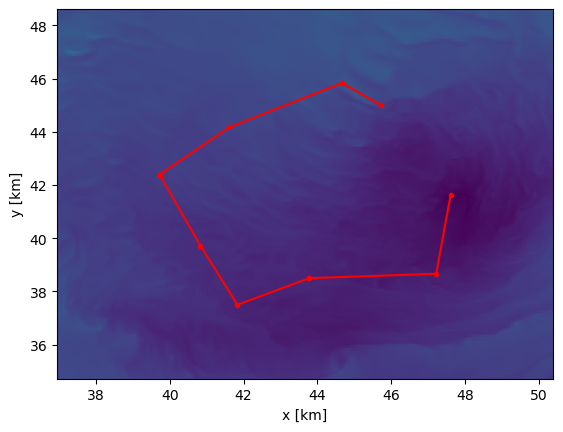

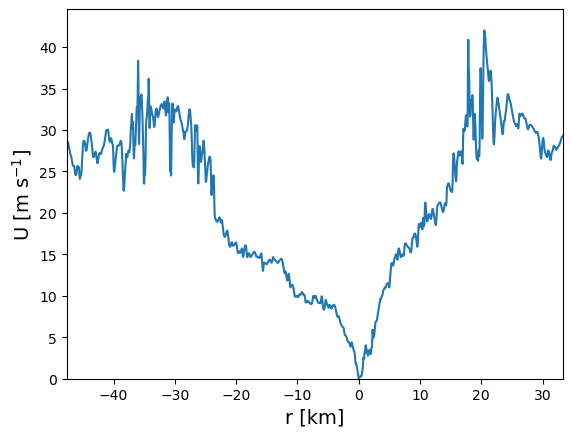

In [11]:
#%% Find hurricane center for each time
# Choose height at which the center of the hurricane is going to be defined
iz_c = 0

# Initialize array
center = np.zeros([len(ttime),2]) + np.nan # [x,y]

X_grid,Y_grid = np.meshgrid(n_x,n_y)
X_grid = X_grid.flatten()
Y_grid = Y_grid.flatten()

for iitt in np.arange(np.shape(uv)[0]):
    # Ignore boundaries of domain
    temp_uv = np.zeros(np.shape(uv[iitt,iz_c,:,:])) + uv[iitt,iz_c,:,:]
    temp_uv[0:10,:] = np.nan
    temp_uv[-10:,:] = np.nan
    temp_uv[:,0:10] = np.nan
    temp_uv[:,-10:] = np.nan
    uv_flat = temp_uv.flatten() 
    uv_flat[np.isnan(uv_flat)] = 0
    max_ws_ref = np.argmax(uv_flat)
    temp_x,temp_y = np.meshgrid(n_x,n_y)
    temp_x = temp_x.flatten()
    temp_y = temp_y.flatten()
    # Limits of area where to look for hurricane center
    lim_low_x = temp_x[np.argmax(uv_flat)] - 50000
    lim_low_y = temp_y[np.argmax(uv_flat)] - 50000
    lim_high_x = temp_x[np.argmax(uv_flat)] + 50000
    lim_high_y = temp_y[np.argmax(uv_flat)] + 50000
    
    if domain=='d02':
        lim_low_x = np.mean(n_x) - 0.3*n_x[-1]
        lim_low_y = np.mean(n_x) - 0.3*n_x[-1]
        lim_high_x = np.mean(n_x) + 0.3*n_x[-1]
        lim_high_y = np.mean(n_x) + 0.3*n_x[-1]
    temp_x = 0.0
    temp_y = 0.0
    # Create small meshgrid
    small_x,small_y = np.meshgrid(n_x[(n_x<lim_high_x)&(n_x>lim_low_x)],n_y[(n_y<lim_high_y)&(n_y>lim_low_y)])
    flat_smallX = small_x.flatten()
    flat_smallY = small_y.flatten()

    # Crop array
    temp_uv_1 = uv[iitt,0,(n_y<lim_high_y)&(n_y>lim_low_y),:]
    temp_uv_2 = temp_uv_1[:,(n_x<lim_high_x)&(n_x>lim_low_x)]
    # Flatten array
    temp_uv_flat = temp_uv_2.flatten()
    # Find location of minimum
    if np.any(temp_uv_flat)==True:
        i_min = np.argmin(temp_uv_flat)
        # Save location of minimum
        center[iitt,0] = flat_smallX[i_min]
        center[iitt,1] = flat_smallY[i_min]
    else:
        # Save location of minimum
        center[iitt,0] = np.mean(n_x)
        center[iitt,1] = np.mean(n_y)
# Free-up memory
X_grid = 0.0
Y_grid = 0.0
temp_uv = 0.0
uv_flat = 0.0
max_ws_ref = 0.0
small_x = 0.0
small_y = 0.0
flat_smallX = 0.0
flat_smallY = 0.0
temp_uv_1 = 0.0
temp_uv_2 = 0.0
temp_uv_flat = 0.0

# Visualize results for a given time
iitt = -1

# Show area considered for center of hurricane
plt.figure()
plt.pcolormesh(n_x/1000,n_y/1000,uv[iitt,iz_c,:,:]) 
plt.plot(center[:,0]/1000,center[:,1]/1000,'o-',color='red',markersize=3)
# plt.scatter(center[iitt,0]/1000,center[iitt,1]/1000)
plt.fill(np.array([lim_low_x,lim_high_x,lim_high_x,lim_low_x])/1000,np.array([lim_low_y,lim_low_y,lim_high_y,lim_high_y])/1000,facecolor='none',edgecolor='r',linestyle=':',label='Area')
plt.xlabel('x [km]')
plt.ylabel('y [km]')
plt.xlim((min(center[:,0]) - 50*dx)/1000,(max(center[:,0]) + 50*dx)/1000)
plt.ylim((min(center[:,1]) - 50*dx)/1000,(max(center[:,1]) + 50*dx)/1000)
plt.show()
plt.close()  


# Radial distribution of wind speed
plt.figure()
r_x = (n_x - center[iitt,0])/1000
plt.plot(r_x,uv[iitt,0,int(center[iitt,1]/dx),:])
plt.xlim(np.min((n_x - center[iitt,0])/1000),np.max((n_x - center[iitt,0])/1000))
plt.xlim(np.max([-200,r_x[0]]),np.min([200,r_x[-1]]))
plt.ylim(0,np.max(uv[:,iz_c,int(center[iitt,1]/dx),:]))
plt.xlabel('r [km]',fontsize=14)
plt.ylabel('U [m s$^{-1}$]',fontsize=14)
plt.show()
plt.close()  



[[775.  814.5]
 [846.  827. ]
 [764.5 792. ]
 [786.  760.5]
 [748.  734.5]
 [797.  759.5]
 [777.  762.5]
 [737.5 735.5]
 [708.  737.5]]
[[823. 810.]
 [804. 825.]
 [749. 795.]
 [715. 763.]
 [735. 715.]
 [753. 675.]
 [788. 693.]
 [850. 696.]
 [857. 749.]]


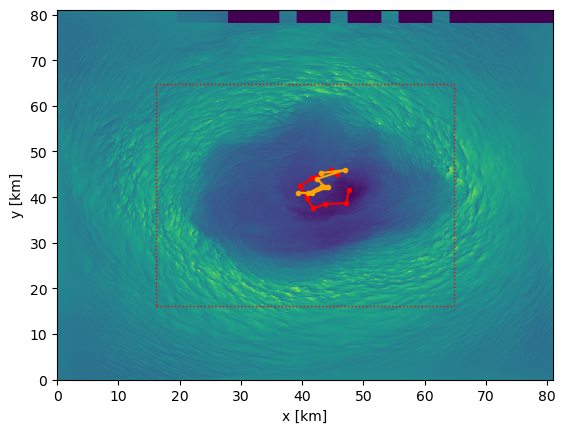

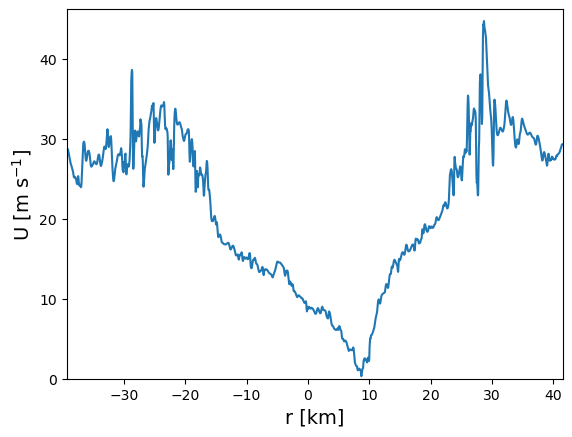

In [12]:
#%% Find geometrical center for LES (it is nearly unchanged for mesoscale)
if domain == 'd02':
    # Choose height at which the center of the hurricane is going to be defined
    iz_c = 0

    # Initialize array
    center_geo = np.zeros_like(center) + np.nan # [x,y]

    X_grid,Y_grid = np.meshgrid(n_x,n_y)
    X_grid = X_grid.flatten()
    Y_grid = Y_grid.flatten()

    for iitt in np.arange(np.shape(uv)[0]):
        # Find center of hurricane as mid-point between maxima
        for i_n in np.arange(20):
            if i_n==0:
                temp_cent = center[iitt,:] + 0.0
            else:
                temp_cent = center_geo[iitt,:] + 0.0
            temp_uv = np.zeros(np.shape(uv[iitt,iz_c,:,:])) + uv[iitt,iz_c,:,:]

            cent0_y = np.argmax(temp_uv[0:int(temp_cent[1]/dx),int(temp_cent[0]/dx)])
            cent1_y = int(temp_cent[1]/dx) + np.argmax(temp_uv[int(temp_cent[1]/dx):,int(temp_cent[0]/dx)])

            cent0_x = np.argmax(temp_uv[int(temp_cent[1]/dx),0:int(temp_cent[0]/dx)])
            cent1_x = int(temp_cent[0]/dx) + np.argmax(temp_uv[int(temp_cent[1]/dx),int(temp_cent[0]/dx):])

            center_geo[iitt,0] = dx*np.mean([cent0_x,cent1_x])
            center_geo[iitt,1] = dx*np.mean([cent0_y,cent1_y])
        
    print(center_geo/dx)
    print(center/dx)
    
    # Visualize results for a given time
    iitt = -1

    # Show area considered for center of hurricane
    plt.figure()
    plt.pcolormesh(n_x/1000,n_y/1000,uv[iitt,iz_c,:,:]) 
    plt.plot(center[:,0]/1000,center[:,1]/1000,'o-',color='red',markersize=3)
    plt.plot(center_geo[:,0]/1000,center_geo[:,1]/1000,'o-',color='orange',markersize=3)
    # plt.scatter(center[iitt,0]/1000,center[iitt,1]/1000)
    plt.fill(np.array([lim_low_x,lim_high_x,lim_high_x,lim_low_x])/1000,np.array([lim_low_y,lim_low_y,lim_high_y,lim_high_y])/1000,facecolor='none',edgecolor='r',linestyle=':',label='Area')
    plt.xlabel('x [km]')
    plt.ylabel('y [km]')
#     plt.xlim((min(center[:,0]) - 80*dx)/1000,(max(center[:,0]) + 80*dx)/1000)
#     plt.ylim((min(center[:,1]) - 80*dx)/1000,(max(center[:,1]) + 80*dx)/1000)
    plt.show()
    plt.close()  


    # Radial distribution of wind speed
    plt.figure()
    r_x = (n_x - center_geo[iitt,0])/1000
    plt.plot(r_x,uv[iitt,0,int(center_geo[iitt,1]/dx),:])
    plt.xlim(np.min((n_x - center_geo[iitt,0])/1000),np.max((n_x - center_geo[iitt,0])/1000))
    plt.xlim(np.max([-200,r_x[0]]),np.min([200,r_x[-1]]))
    plt.ylim(0,np.max(uv[:,iz_c,int(center_geo[iitt,1]/dx),:]))
    plt.xlabel('r [km]',fontsize=14)
    plt.ylabel('U [m s$^{-1}$]',fontsize=14)
    plt.show()
    plt.close()  
    
    # Use geometrical center instead of wind speed minima
    center = np.zeros_like(center_geo) + center_geo

In [13]:
# Visualize results for a given time
# stop
if domain == 'd01':
    iitt = len(ttime)-3 # 21

    # Show area considered for center of hurricane
    plt.figure()
    plt.title(str(ttime[iitt]))
    plt.pcolormesh(n_x/1000,n_y/1000,uv[iitt,iz_c,:,:]) 
    plt.scatter(center[iitt,0]/1000,center[iitt,1]/1000,color='red',s=3)
    # plt.plot(center[:,0]/1000,center[:,1]/1000,'o-',color='red',markersize=3)
    # plt.fill(np.array([lim_low_x,lim_high_x,lim_high_x,lim_low_x])/1000,np.array([lim_low_y,lim_low_y,lim_high_y,lim_high_y])/1000,facecolor='none',edgecolor='r',linestyle=':',label='Area')
    plt.xlabel('x [km]')
    plt.ylabel('y [km]')
    plt.xlim((min(center[:,0]) - 50*dx)/1000,(max(center[:,0]) + 50*dx)/1000)
    plt.ylim((min(center[:,1]) - 50*dx)/1000,(max(center[:,1]) + 50*dx)/1000)
    plt.show()
    plt.close()  
    
    print(iitt)
    print(len(ttime))


In [14]:
center

array([[43055.5893898 , 45250.0355587 ],
       [47000.0369339 , 45944.48054886],
       [42472.25559807, 44000.03457642],
       [43666.70098114, 42250.03320122],
       [41555.58821106, 40805.58762169],
       [44277.81257248, 42194.47760201],
       [43166.70058823, 42361.14439964],
       [40972.25441933, 40861.1432209 ],
       [39333.36424255, 40972.25441933]])

In [15]:
#%% Save time series of hurricane's center
# Time since start
time_sinceStart = (ttime - ttime[0])/np.timedelta64(1,'s')


fName = 'center_inTime.txt'
with open(WRF_DIRECTORY + fName, 'w') as f:
    strr = 'Time since start [s], center_x [m], center_y [m]'
    f.write(strr)
    f.write('\n')
    for i in np.arange(len(time_sinceStart)):
        strr = ''
        strr = str(time_sinceStart[i])  + ',' + str(center[i,0]) + ',' + str(center[i,1]) + ','
        f.write(strr)
        f.write('\n')
print("Done with " + WRF_DIRECTORY)

Done with /projects/storm/mgomez/idealSims/sst_26_skipd01_skipCoLES_ndg/Results/
